In [3]:
import torch
import numpy as np
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'1.13.1'

In [4]:
torch.randn(1)

tensor([0.1071])

# Create some data

In [5]:
# linear regression
# Y = mX + b
# Y is the dependent variable, X is the independent variable, m is the slope, b is the intercept
# weight = m, also known as the gradient
# bias = b, also known as the backpropagation

# known parameters
weight = 0.7
bias = 0.3

# created data
X = torch.arange(0, 50, step=1).unsqueeze(dim=1).float()
y = weight * X + bias

display(X[:5], X.shape, X.ndim)

tensor([[0.],
        [1.],
        [2.],
        [3.],
        [4.]])

torch.Size([50, 1])

2

In [6]:
# The model will try to learn what these values are
display(y[:5], y.shape, y.ndim)

tensor([[0.3000],
        [1.0000],
        [1.7000],
        [2.4000],
        [3.1000]])

torch.Size([50, 1])

2

# Split to test and train data

In [7]:
# train on 40 samples to predict the next 10 samples
train_split = 40
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

In [8]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
    plt.figure(figsize=(10, 7))
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")
    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")
    plt.legend(prop={"size": 14})
    plt.show()


# Create a LinearRegressionModel model

In [9]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1))
        self.bias = nn.Parameter(torch.randn(1))

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        """
        :param x: the input/training data
        :return:
        """
        # the linear regression formula
        return self.weights * x + self.bias

# Create a model instance & initial predictions

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])
tensor([[13.5964],
        [13.9331],
        [14.2698],
        [14.6065],
        [14.9432],
        [15.2799],
        [15.6166],
        [15.9533],
        [16.2899],
        [16.6266]])


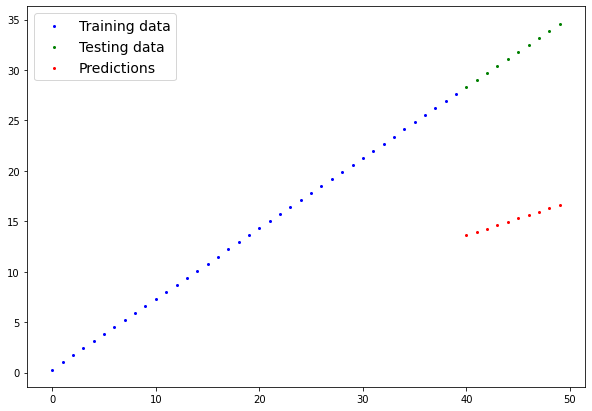

In [10]:
torch.manual_seed(42)
model_0 = LinearRegressionModel()
print(model_0.state_dict())

with torch.inference_mode():
    y_predictions = model_0(X_test)

print(y_predictions)
plot_predictions(predictions=y_predictions)

# Create a loss & optim function

In [11]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01)

# Train the model

Epoch: 0/100, loss: 7.2557, test_loss: 7.6510
Epoch: 10/100, loss: 0.7543, test_loss: 6.6827
Epoch: 20/100, loss: 0.9349, test_loss: 6.3415
Epoch: 30/100, loss: 1.0864, test_loss: 6.0002
Epoch: 40/100, loss: 1.1593, test_loss: 5.8840
Epoch: 50/100, loss: 1.2125, test_loss: 5.7677
Epoch: 60/100, loss: 1.2656, test_loss: 5.6515
Epoch: 70/100, loss: 1.3187, test_loss: 5.5352
Epoch: 80/100, loss: 1.3718, test_loss: 5.4190
Epoch: 90/100, loss: 1.4249, test_loss: 5.3028
Epoch: 99/100, loss: 2.3395, test_loss: 3.4777

		_> Done training ✅

0.3946 7.2557


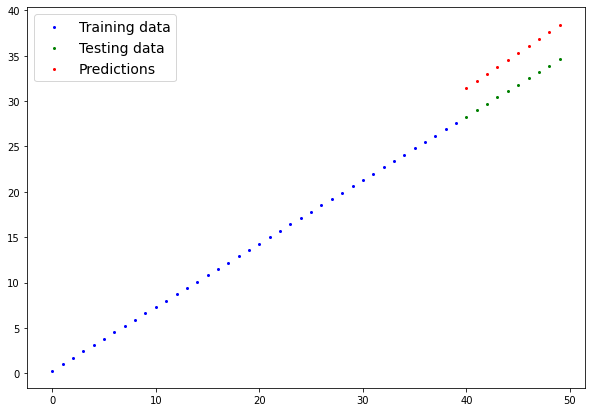

In [12]:
torch.manual_seed(42)

epochs = 100
epoch, loss = None, None
losses_list = []
test_losses_list = []
epoch_list = []

for epoch in range(epochs):
    epoch_list.append(epoch)

    # set model to train mode
    model_0.train()

    # 1. forward propagation
    y_pred = model_0(X_train)

    # 2. calculate loss
    loss = loss_fn(y_pred, y_train)
    losses_list.append(round(loss.item(), 4))

    # 3. optimize weights
    optimizer.zero_grad()

    # 4. perform backpropagation
    loss.backward()

    # 5. gradient descent
    optimizer.step()

    # turn off gradient tracking
    model_0.eval()
    with torch.inference_mode():
        # forward propagation
        test_predictions = model_0(X_test)

        # calculate loss
        test_loss = loss_fn(test_predictions, y_test)
        test_losses_list.append(round(test_loss.item(), 4))

    if epoch % 10 == 0:
        print(f"Epoch: {epoch}/{epochs}, "
              f"loss: {loss.item():.4f}, "
              f"test_loss: {test_loss.item():.4f}")
        # print(f"\t{model_0.state_dict()}")

print(f"Epoch: {epoch}/{epochs}, "
      f"loss: {loss.item():.4f}, "
      f"test_loss: {test_loss.item():.4f}")
# print(f"\t{model_0.state_dict()}")

print('\n\t\t_> Done training ✅\n')
print(min(losses_list), max(losses_list))

with torch.inference_mode():
    preds = model_0(X_test)

plot_predictions(predictions=preds)

# Plot the loss curves

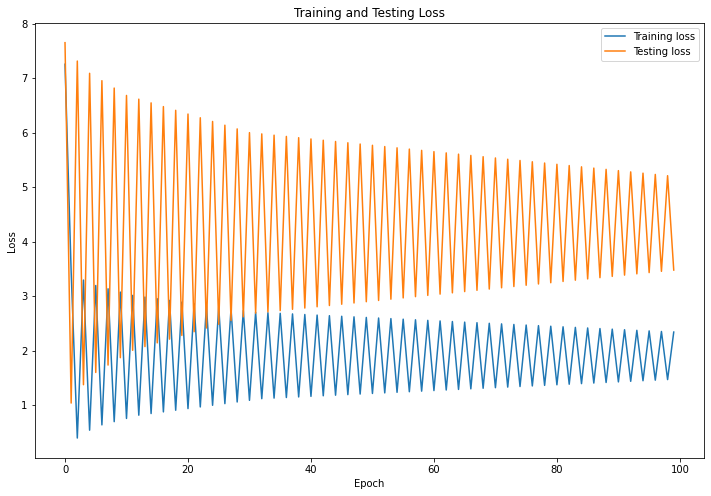

In [13]:
plt.plot(epoch_list, np.array(torch.tensor(losses_list).numpy()), label="Training loss")
plt.plot(epoch_list, test_losses_list, label="Testing loss")
plt.title("Training and Testing Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend()

# increase the size of the plot
plt.gcf().set_size_inches(12, 8)

plt.show()